In [31]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [32]:
loc1, loc2, loc3, loc4, sigma1, sigma2 = 10, 14, 19, 16, 3, 4
np.random.seed(2)

In [33]:
x1_1, x2_1 = np.random.normal(loc=loc1, scale=sigma1, size=50), np.random.normal(loc=loc2, scale=sigma1, size=50)

In [34]:
x1_2, x2_2 = np.random.normal(loc=loc3, scale=sigma2, size=50), np.random.normal(loc=loc4, scale=sigma2, size=50)

In [35]:
data = pd.DataFrame(columns=['x1', 'x2'], index=range(1, 101))

In [36]:
data['x1'] = np.concatenate((x1_1, x1_2))
data['x2'] = np.concatenate((x2_1, x2_2))

In [37]:
data['y'] = 0
data.loc[:51, 'y'] = 0
data.loc[51:, 'y'] = 1
data.head()

,x1,x2,y
1,8.749726,17.001098,0
2,9.831200,12.856722,0
3,3.591412,12.872992,0
4,14.920812,13.776588,0
5,4.619693,15.300489,0


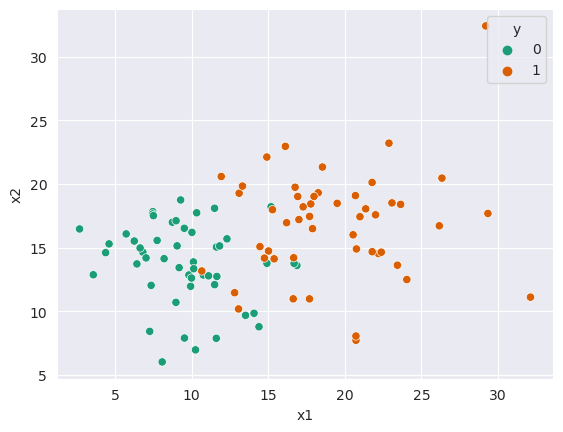

In [38]:
sns.scatterplot(x='x1', y='x2', data=data, hue='y', palette='Dark2')
plt.savefig('report_pictures/scatter.png')

In [39]:
from sklearn.model_selection import cross_val_predict, cross_validate
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay
X = data.drop('y', axis=1)
y = data['y']

In [40]:
model = GaussianNB()
cv_pred = cross_val_predict(model, X, y, cv=10)
cv_scores = cross_validate(model, X, y, cv=10, scoring=['accuracy', 'f1', 'precision', 'recall'])

In [41]:
pd.DataFrame(cv_scores).head()

,fit_time,score_time,test_accuracy,test_f1,test_precision,test_recall
0,0.000867,0.002615,0.9,0.909091,0.833333,1.0
1,0.000840,0.002514,1.0,1.000000,1.000000,1.0
2,0.000870,0.002480,0.9,0.909091,0.833333,1.0
3,0.000847,0.002486,1.0,1.000000,1.000000,1.0
4,0.000854,0.002476,1.0,1.000000,1.000000,1.0


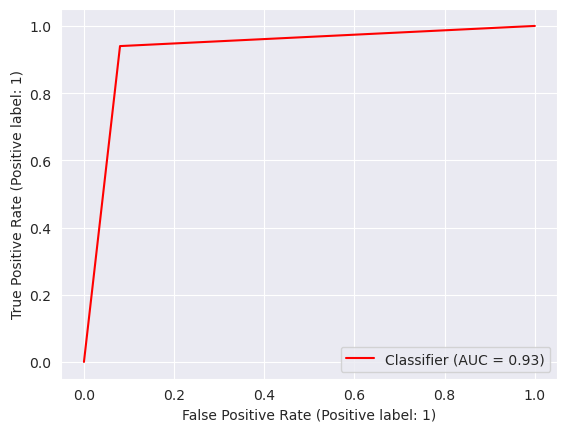

In [42]:
rc = RocCurveDisplay.from_predictions(y, cv_pred, color='red')
rc.figure_.savefig('report_pictures/rc.png')

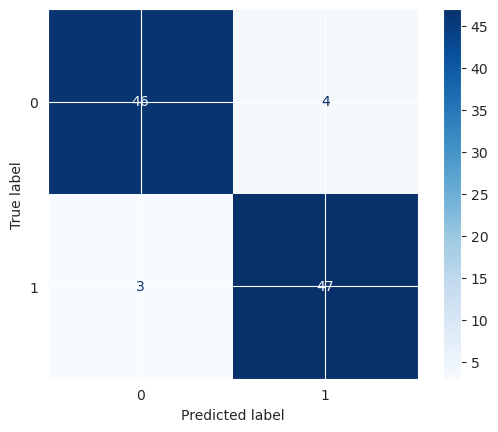

In [43]:
cm = ConfusionMatrixDisplay.from_predictions(y, cv_pred, cmap='Blues')
cm.figure_.savefig('report_pictures/confusion.png')

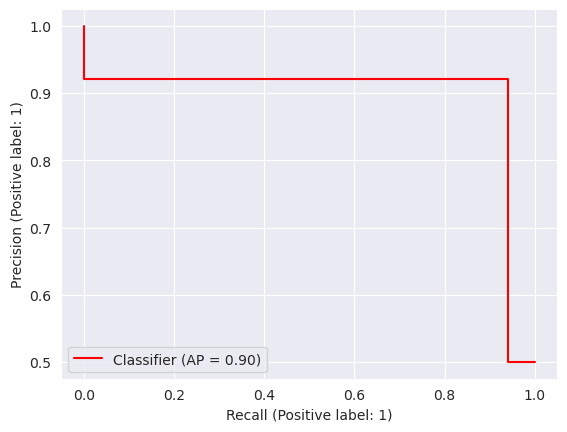

In [44]:
from sklearn.metrics import PrecisionRecallDisplay
pr = PrecisionRecallDisplay.from_predictions(y, cv_pred, color='red')
pr.figure_.savefig('report_pictures/pr.png')

In [45]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y, cv_pred))

0.93
